# Augmented Dickey-Fuller (ADF) test

### Basic Idea
The ADF test operates under the null hypothesis that the time series has a unit root (is non-stationary). It tests whether the time series is better modeled by an AR process without a unit root.

### Equations
The ADF test involves estimating the following regression model:
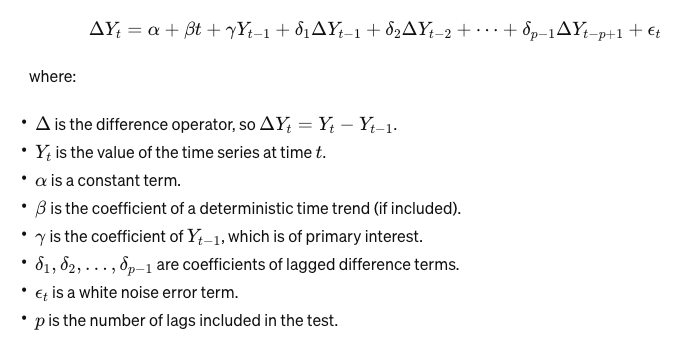

### Hypothesis Testing

- Null Hypothesis (H0): The time series has a unit root (γ=0)
- Alternative Hypothesis (H1): The time series does not have a unit root (γ<0)

### Test Statistic
The test statistic is calculated based on the estimated coefficient γ. The closer this statistic is to more negative values, the stronger the evidence against the null hypothesis.

### Usage
In practice, the ADF test is widely used in econometrics and financial analysis to check the stationarity of time series data. Its ability to include multiple lagged difference terms makes it flexible and suitable for a wide range of time series data.

# AR Process
The autoregressive (AR) model is a type of time series model that expresses the current value of a series as a linear combination of its previous values plus a random error term. The general form of an AR model of order p (AR(p)) is:

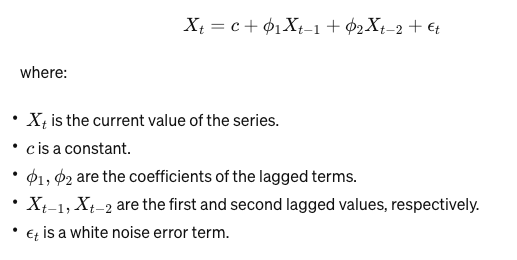

# Stationarity
In time series analysis, stationarity is a crucial property. A stationary time series has statistical properties such as mean, variance, and no seasonality over time. Non-stationary series, on the other hand, can have properties that change over time, making them challenging to model and forecast.

# Unit Roots
A unit root is a condition in the AR model where one or more of the characteristic roots (solutions to the characteristic equation of the AR process) is equal to 1 (or equivalently, the absolute value is equal to or greater than 1). This situation implies that the time series does not revert to a long-run mean and can lead to a stochastic trend in the series, a sign of non-stationarity.

In [19]:
def generate_ar_process(lags, coefs, length):

    # turn coefs to np array
    coefs = np.array(coefs)

    # initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        # get previous values of the series in reversed
        prev_vals = series[-lags:][::-1]

        # get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()

        series.append(new_val)
    

In [20]:
def perform_adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistics: {result[0]:f}')
    print(f'p-value: {result[1]:f}')

# AR 1 Process
- Applying Augmented Dickey-Fuller Test using AR 1 processes
- if -1 < coefficient < 1, the AR series is stationary.

### Stationary AR 1 Process

Text(0.5, 1.0, 'Stationary AR1 Processs')

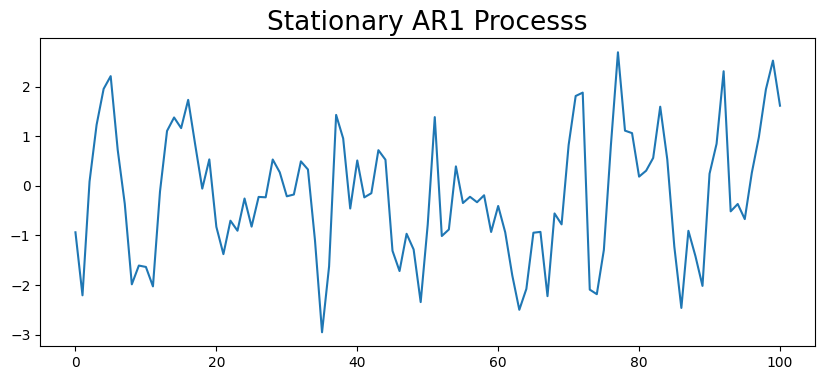

In [21]:
# coef = 0.5
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR1 Processs', fontsize=19)

In [22]:
perform_adf_test(ar_1_process)

ADF Statistics: -6.166927
p-value: 0.000000


#### Since the p-value is < 0.05, it rejects the null-hypothesis, showing that it is a stationary time series.

### Non-Stationary AR 1 Process

Text(0.5, 1.0, 'Non-Stationary AR1 Process')

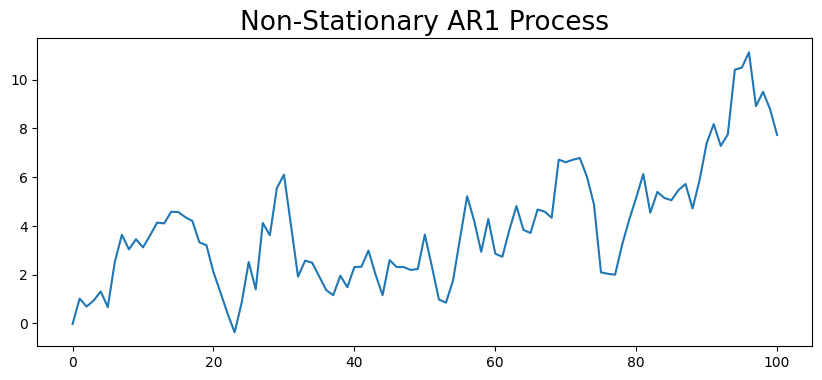

In [23]:
# coef = 1, meaning it has unit-root
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR1 Process', fontsize=19)

In [24]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistics: -2.244828
p-value: 0.190379


#### Since the p-value is > 0.05, it doesn't reject the null-hypothesis, showing that it is not a stationary time series.

# AR 2 Process
- Applying Augmented Dickey-Fuller Test using AR 2 processes
- Similarly, if -1 < coefficient < 1, the AR series is stationary.
  
### Stationary AR 2 Process

Text(0.5, 1.0, 'Stationary AR2 Process')

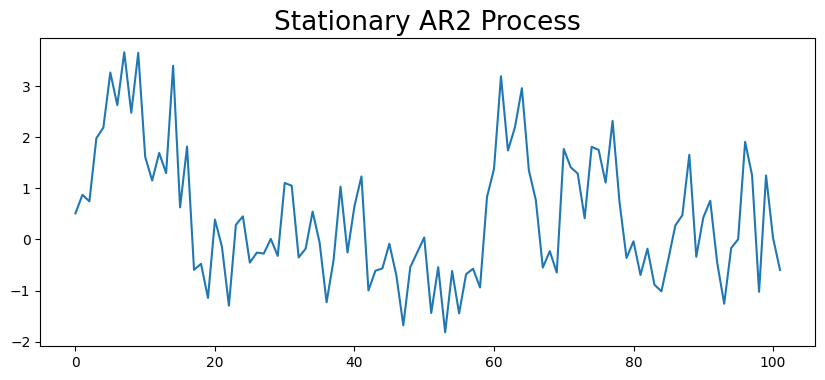

In [25]:
# 2 lags, each with coefficients 0.5 and 0.3 respectively

ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR2 Process', fontsize=19)

In [26]:
perform_adf_test(ar_2_process)

ADF Statistics: -3.272216
p-value: 0.016167


#### Since the p-value is < 0.05, it rejects the null-hypothesis, showing that it is a stationary time series.

### Non-Stationary AR 2 Process

Text(0.5, 1.0, 'Non-Stationary AR2 Process')

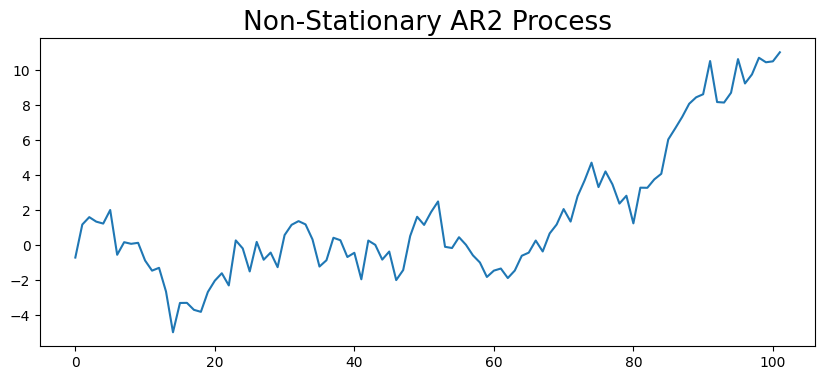

In [27]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR2 Process', fontsize=19)

In [28]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistics: 0.221078
p-value: 0.973419


#### Since the p-value is > 0.05, it doesn't reject the null-hypothesis, showing that it is not a stationary time series.